In [13]:

import glob
import PySimpleGUI as sg
import numpy as np
from PIL import Image, ImageTk,ImageOps
import cv2
import array as arr
import os
from os import listdir
from math import *
import math
import random
import matplotlib.pyplot as plt

Reading the image from folder

In [14]:

def parse_folder(path):
  for images in glob.iglob(f'{path}/*'):
    if (images.endswith(".png") or images.endswith(".jpg") or images.endswith(".jpeg")):
        
        return images
def load_image(path, window):
    try:
        image = Image.open(path)
        image.thumbnail((200, 200))
        photo_img = ImageTk.PhotoImage(image)
        window["im1"].update(data=photo_img)
    except:
        print(f"Unable to open {path}!")

In [15]:
z = 5 //2
print(z)

2


In [16]:
def pad(path):

   img = Image.open(path)
   img =ImageOps.grayscale(img)
   w,h = img.size
   kernel = np.zeros((w+2,h+2),dtype=np.uint8)
   for i in range(0,w):
        for j in range(0,h):
            kernel[i+1][j+1] = img.getpixel((i,j))

   g = Image.fromarray(kernel)
   # g.show()
   # img.show()
   return g
pad('D:/CS/SEM7/IMAGE/CODE/test/B2DBy.jpg')
cv2.waitKey(0)

-1

In [17]:
def medianfilter(img,window):
    m_img = img
    mapp=m_img.load()
    w,h = img.size
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    m_w = 3
    m_h=3
    for i in range(1,w-2):
        for j in range(1,h-2):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    mask[x][y] = img.getpixel((xx,yy))
                    yy+=1
                xx+=1
                yy=j-1
            m = np.median(mask)
            k[i,j]= m
    g = Image.fromarray(k)
    # g.show()
    # img.show()
    g.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(g)
    window["im2"].update(data=photo_img)
# t = pad('D:/CS/SEM7/IMAGE/CODE/test/B2DBy.jpg')
# medianfilter(t)

In [18]:
def avregingfilter(img,window):
    m_img = img
    mapp=m_img.load()
    w,h = img.size
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    m_w = 3
    m_h=3
    kernel = np.ones((3,3))
    kernel = kernel /9
    for i in range(1,w-2):
        for j in range(1,h-2):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    mask[x][y] = img.getpixel((xx,yy))
                    yy+=1
                xx+=1
                yy=j-1
            tot=0
            for x in range(m_w):
                for y in range(m_h):
                    tot+= mask[x][y] * kernel[x][y]

            k[i,j]= tot
    g = Image.fromarray(k)
    # g.show()
    # img.show()
    g.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(g)
    window["im3"].update(data=photo_img)
# t = pad('D:/CS/SEM7/IMAGE/CODE/test/a.png')
# avregingfilter(t)

Gaussian 3*3 Matrix
1/16 * [1,2,1] [2,4,2] [1,2,1]

In [36]:
def gausian(img,window):
    m_img = img
    mapp=m_img.load()
    w,h = img.size
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    m_w = 3
    m_h=3
    kernel = np.ones((3,3))
    kernel[0,0]= 1/16
    kernel [0,1] = 2/16
    kernel[0,2]= 1/16
    kernel[1,0]=2/16
    kernel[1,1] = 4/16
    kernel[1,2]=2/16
    kernel[2,0]=kernel[2,2]=1/16
    kernel[2,1] = 2/16
    for i in range(1,w-2):
        for j in range(1,h-2):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    mask[x][y] = img.getpixel((xx,yy))
                    yy+=1
                xx+=1
                yy=j-1
            # tot=0

            # for x in range(m_w):
            #     for y in range(m_h):
            #         tot+= mask[x][y] * kernel[x][y]
            k[i,j] = np.sum(kernel * mask)

            k[i,j]=np.sum(mask*kernel)
    g = Image.fromarray(k)
    # g.show()
    # img.show()
    g.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(g)
    window["im4"].update(data=photo_img)

In [35]:
# t=pad('D:/CS/SEM7/IMAGE/CODE/test/a.png')
# gausian(t)
# img = cv2.imread('D:/CS/SEM7/IMAGE/CODE/test/a.png',0)
# ii=cv2.GaussianBlur(img,(3,3),0)
# cv2.imshow('ss',ii)
# cv2.waitKey(0)


-1

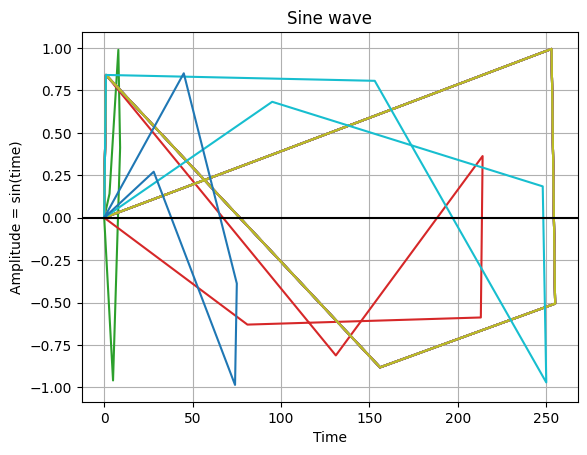

-1

In [64]:
def sinu(path):
    img = cv2.imread(path,0)
    arr = np.array(img)
    arr.flatten()
    # arr= np.arange(arr)
    time = np.arange(0, 10, 0.1)
    amplitude = np.sin(arr)
    plt.plot(arr, amplitude)
    plt.title('Sine wave')
    plt.xlabel('Time')
    plt.ylabel('Amplitude = sin(time)')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.show()
    plt.show()
sinu('C:/Users/user/Desktop/b.png')
cv2.waitKey(0)

In [ ]:
# x(k) = E(n=0,w) img(n) * e^-2jpink/n
# x(k) = 
def fourir(path):
    img = cv2.imread(path,0)
    w,h = img.shape
    forir= np.zeros_like(img,dtype=complex)
    for i in range(w):
        for j in range(h):
            fx=0
            fy=0
            for x in range(w):
              if img[i][j]==img[x][j]:
                fx+=1
            for x in range(h):
              if img[i][j]==img[i][x]:
                fy+=1
                # tot+=ff
            fx /=w
            fy/=h
            ff= img[i][j] *(np.e**(complex(0,-2)*np.pi*((i*fx)/w)+((j*fy)/h))) 
            forir[i][j]=ff
    
    x = forir.real
    y = forir.imag
    fshift = np.fft.fftshift(forir)
    # magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.subplot(122),plt.imshow(fshift, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    # plt.plot(x, y, 'g*')
    # plt.subplot(122),plt.imshow(, cmap = 'gray')
    # plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    # plt.show()
fourir('C:/Users/user/Desktop/b.png')
cv2.waitKey(0)

In [21]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
def gaussian2(size,img):
    w,h = img.size
    m_w=m_h=3
    std=math.sqrt(m_w*m_h)
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, std)
        kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
    kernel_2D *= 1.0 / kernel_2D.max()
    print(kernel_2D)
    for i in range(1,w-2):
        for j in range(1,h-2):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    mask[x][y] = img.getpixel((xx,yy))
                    yy+=1
                xx+=1
                yy=j-1
            k[i,j] = np.sum(kernel_2D * mask)
            # k[i,j] /= 9
    g = Image.fromarray(k)
    g.show()
    img.show()
t = pad('D:/CS/SEM7/IMAGE/CODE/test/a.png')
# std = np.std(t)
gaussian2(3,t)

[[0.89483932 0.94595947 0.89483932]
 [0.94595947 1.         0.94595947]
 [0.89483932 0.94595947 0.89483932]]


In [22]:
def adaptivemdeianfilter(img,window):
    # p = img.getpixel((2,2))
    # print(p)
    w,h = img.size
    m_w=m_h=3
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    for i in range(1,w-2):
        for j in range(1,h-2):
            m_w=m_h=3
            flag=0
            mask = np.zeros((m_w,m_h))
            xx=i-m_w//2
            yy=j-m_h//2
            while (m_w <=7):
                mask = np.zeros((m_w,m_h))
                for x in range(m_w):
                    for y in range(m_h):
                        if xx>0 and xx<w and yy>0 and yy<h:
                            p = img.getpixel((xx,yy))
                        else:
                            p=0
                        mask[x][y] = p
                        yy+=1
                    xx+=1
                    yy=j - m_h//2
                zmin = np.amin(mask)
                zmax = np.max(mask)
                zmed = np.median(mask)
                pixel = int(img.getpixel((i,j)))
                a1 = zmed - zmin
                a2 = zmed - zmax
                if a1>0 and a2<0:
                    b1= pixel -zmin
                    b2 = pixel -zmax
                  #  print('in')
                    if b1>0 and b2<0 :

                        k[i][j] = pixel
                        flag+=1
                        break
                    else:
                        k[i][j] = zmed
                        flag+=1
                        break
                else:
                    m_w+=2
                    m_h+=2
            if flag==0:
                k[i][j] = zmed
               # print('not in')
    g = Image.fromarray(k)
#     g.show()
    g.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(g)
    window["im5"].update(data=photo_img)
# t = pad('D:/CS/SEM7/IMAGE/CODE/test/a.png')
# adaptivemdeianfilter(t)

Adding salt and pepper noise


In [23]:

def saltandpepper(path,window): 
    img= Image.open(path)
    img =ImageOps.grayscale(img)
    mapp=img.load()
    w,h= img.size
    s = w*h
    noisedp = random.randint(50, 600)
    for i in range(noisedp):
        y_coord=random.randint(0, h - 1)
        x_coord=random.randint(0, w - 1)
        mapp[x_coord,y_coord]= 255
        noisedp = random.randint(50 , 600)
        for i in range(noisedp):
            y_coord=random.randint(0, h - 1)
            x_coord=random.randint(0, w - 1)
            mapp[x_coord,y_coord]= 0
    img.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(img)
    window["im6"].update(data=photo_img)

# # t = pad('D:/CS/SEM7/IMAGE/CODE/test/B2DBy.jpg')
# saltandpepper('D:/CS/SEM7/IMAGE/CODE/test/B2DBy.jpg')

Geometric mean filter to remove gaussia noise


In [24]:
def g_mean(x):
    x2 = x.flatten()
    # x_new = [i for i in x2 if i != 0]
    a = np.prod(x2)
    return np.power(a,1/9)
# arr= np.array([5,16,22,6,3,16,12,3,15])
# print(g_mean(arr))

In [25]:
def geomean(img,window):
    m_img = img
    
    w,h = img.size
    k = np.zeros((w-2,h-2),dtype=np.uint8)
    m_w = 3
    m_h=3
    i2=0
    for i in range(1,w-2):
        j2=0
        for j in range(1,h-2):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    mask[x][y] = img.getpixel((xx,yy))
                    if mask[x][y] ==0:
                        mask[x][y] = 1
                
                    yy+=1
                xx+=1
                yy=j-1
            m = g_mean(mask)
            # m = np.prod(mask)
            # m = np.power(m,1/9)
            # m = np.sum(mask)
            # m/= (m_w*m_h)
            k[i2,j2]= m
            j2+=1
        i2+=1
    g = Image.fromarray(k)
    # g.show(title="modimg")
    # # img.show()
    g.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(g)
    window["im7"].update(data=photo_img)
# t = pad('D:/Downloads/Noisy-image-Gaussian-noise-with-mean-and-variance-0005.png')
# t.show()
# geomean(t)

Removing impulse noise using median filter

In [26]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

# plt.imshow(img)
# plt.show() 
def removesalt(path,size,window):
    img = Image.open(path).convert("L")
    arr = np.array(img)
    removed_noise = median_filter(arr, size) 
    img = Image.fromarray(removed_noise)
# img.show()
    img.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(img)
    window["im8"].update(data=photo_img)
# plt.imshow(img)
# plt.show()

In [27]:
def retgau(img):
    # img  = Image.fromarray(img)
    m_img = img
    # mapp=m_img.load()
    w,h = img.shape
    print(w)
    print(h)
    k = np.zeros((w,h),dtype=np.uint8)
    m_w = 3
    m_h=3
    kernel = np.ones((3,3))
    kernel[0,0]= 1/16
    kernel [0,1] = 2/16
    kernel[0,2]= 1/16
    kernel[1,0]=2/16
    kernel[1,1] = 4/16
    kernel[1,2]=2/16
    kernel[2,0]=kernel[2,2]=1/16
    kernel[2,1] = 2/16
    for i in range(w):
        for j in range(h):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    if xx>0 and xx<w and yy>0 and yy<h:
                        mask[x][y] = img[xx,yy]
                    else:
                        mask[x][y] = 0
                    yy+=1
                xx+=1
                yy=j-1
            k[i,j] = np.sum(kernel * mask)
    # g = Image.fromarray(k)
    # print(g.size)
    return k

sharpeningfilters


In [28]:
def unsharphighboost(k,path,window):
    # k=2
    img = cv2.imread(path,0)
    # cv2.imshow("normal",img)
    # cv2.imshow("ss",img)
    w,h = img.shape
    k22 = np.zeros_like(img)
    # kernel = np.ones((3,3))
    # kernel = kernel /9
    kernel = np.ones((3,3))
    kernel[0,0]= 1/16
    kernel [0,1] = 2/16
    kernel[0,2]= 1/16
    kernel[1,0]=2/16
    kernel[1,1] = 4/16
    kernel[1,2]=2/16
    kernel[2,0]=kernel[2,2]=1/16
    kernel[2,1] = 2/16
    m_w=m_h=3
    for i in range(w):
        for j in range(h):
            mask = np.zeros((3,3))
            xx=i-1
            yy=j-1
            for x in range(m_w):
                for y in range(m_h):
                    if xx>0 and xx<w and yy>0 and yy<h:
                        mask[x][y] = img[xx,yy]
                    else:
                        mask[x][y]=0
                    yy+=1
                xx+=1
                yy=j-1
            tot=0
            for x in range(m_w):
                for y in range(m_h):
                    tot+= mask[x][y] * kernel[x][y]

            k22[i,j]= tot
    
    # cv2.imshow("c",k22)
    mask = img - k22
    highboost = img + k*mask
    # w= "f"
    # cv2.namedWindow(w)  
    # cv2.moveWindow(w, 500,30)  
    # cv2.imshow(w,highboost)
    rr=Image.fromarray(highboost)
    # rr.show()
    rr.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(rr)
    window["im10"].update(data=photo_img)
# unsharphighboost(4,'D:/Downloads/mona.jpg')
# cv2.waitKey(0)

In [29]:
arr =np.array([1,2,3,4,5,6,5,4,5,4,8])
f=0
l=[]
b=0
for i in arr:
    if f==0:
        b=i
        f=1
    else:
        b+=i
        l.append(b)
print(l)

[3, 6, 10, 15, 21, 26, 30, 35, 39, 47]


Histogram equalization


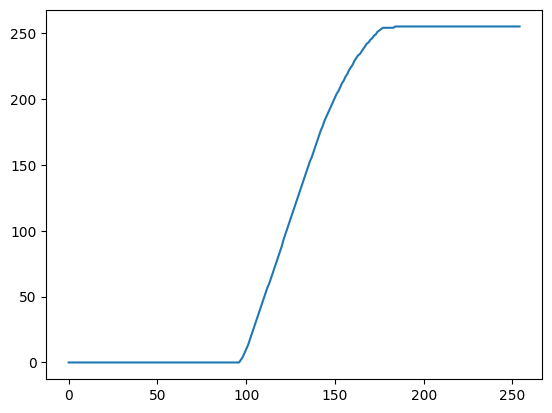

In [30]:
def hmach(path):
    img = Image.open(path)
    img1 = np.asarray(img)
    y = img1.flatten()
    histogram = np.zeros(256)
    for pixel in img1:
        histogram[pixel] += 1
    #plt.hist(y,bins=20)
    
    f=0
    l=[]
    b=0
    for i in histogram:
        if f==0:
            b = int(i)
            f=1
        else:
            b+=int(i)
            l.append((b))
    n = np.array(l)
    #plt.plot(n)
    nj = (n - n.min()) * 255
    N = n.max() - n.min()
    n =nj/N
    n = n.astype('uint8')
    plt.plot(n)
#hmach('D:/CS/SEM7/IMAGE/CODE/test/B2DBy.jpg')
hmach('D:/CS\SEM7/IMAGE/CODE/test/eq/PgaNb.png')

In [31]:
def histeq(path,window):
    img = Image.open(path)
    #img =ImageOps.grayscale(img)
    mapp=img.load()
    h=np.zeros(shape=(256,1))
    width,hight=img.size
    for i in range(width):
        for j in range(hight):
            k=mapp[i,j]
            h[k,0]=h[k,0]+1 

    x= h.reshape(1,256)
    y=np.array([])
    y=np.append(y,x[0,0])

    for i in range(255):
        k=x[0,i+1]+y[i]
        y=np.append(y,k)
    y=np.round((y/(width*hight))*255)
    for i in range (width):
        for j in range (hight):
            k=mapp[i,j]
            mapp[i,j]= int(y[k])
    img.thumbnail((200, 200))
    photo_img = ImageTk.PhotoImage(img)
    window["im9"].update(data=photo_img)


In [32]:


sg.theme("Dark Grey")
layout = [
    [
        sg.Text("Image Folder", size=(9, 1)),
        sg.InputText(key='dest',default_text="Choose a folder...",enable_events=True, size=(59, 1)),
        sg.FolderBrowse(),
    ],
    [
          sg.Frame(
            layout=[
                [
                    sg.Button(key='st',button_text="salt and pepper noise Filter", size=(20, 1)),
                   
                ],
                 [
                    sg.Button(key='gf',button_text="Gaussian Noise Filter", size=(20, 1)),
                   
                ],
                  [
                    sg.Button(key='uni',button_text="Uniform Noise Filter", size=(20, 1)),
                   
                ],
               
            ],
            title="Noise filters",
            relief=sg.RELIEF_GROOVE,
        ),
        sg.Frame(
            layout=[
                [
                    sg.Button(key='sandp',button_text="Add salt and pepper noise", size=(20, 1)),
                   
                ],
                
               
            ],
            title="Add Noise filters",
            relief=sg.RELIEF_GROOVE,
        ),
        sg.Frame(
            layout=[
                [
                    sg.Text('K', size =(1, 1)), sg.InputText(size=(5,1)),
                    sg.Submit(key='high',button_text="Unsharp High Boost Filter", size=(20, 1)),
                   
                ],
                
               
            ],
            title="Sharpening filters",
            relief=sg.RELIEF_GROOVE,
        ),
         sg.Frame(
            layout=[
                [
                    sg.Button(key='hist',button_text="Histogram Equalization", size=(20, 1)),
                   
                ],
                
               
            ],
            title="Histogram Filters",
            relief=sg.RELIEF_GROOVE,
        ),
        sg.Frame(
            layout=[
                [
                    
                    sg.Button(key="median",size=((20,1)),button_text='Median Filter'),
                ],
                [
                    sg.Button(key='aver',button_text="Average Filter", size=(20, 1)),
                    # sg.InputText(default_text="8", size=(3, 1),),
                    # # sg.Text("", size=(22, 1)),
                    # sg.Submit("A nice button", size=(23, 1)),
                ],
                [
                    sg.Button(key='gau',button_text="Gaussian Filter", size=(20, 1)),
                   
                ],
                [
                    sg.Button(key='adap',button_text="Adaptive median Filter", size=(20, 1)),
                   
                ],
                
                
               
            ],
            title="Smoothing Spatial filters",
            relief=sg.RELIEF_GROOVE,
        ),
        sg.Frame(
           layout = [
             [sg.Text("Images", size=(15, 1)),],
             [  sg.Text("Original Image", size=(15, 1)),
                sg.Image(key='im1',size=(30,30))
                ],
                [ sg.Text("Median Filtered Image", size=(15, 1)),
                sg.Image(key='im2',size=(30,30))
                    
                ],
                  [ sg.Text("Average Filtered Image", size=(15, 1)),
                sg.Image(key='im3',size=(30,30))
                    
                ],
                  [ sg.Text("Gaussian Filter Image", size=(15, 1)),
                sg.Image(key='im4',size=(30,30))
                    
                ],
                 [ sg.Text("Adaptive Median Filter Image", size=(15, 1)),
                sg.Image(key='im5',size=(30,30))
                    
                ],
                [ sg.Text("Salt and Pepper Noise", size=(15, 1)),
                sg.Image(key='im6',size=(30,30))
                    
                ],
                [ sg.Text("Gaussian Noise Filter", size=(15, 1)),
                sg.Image(key='im7',size=(30,30))
                    
                ],
                 [ sg.Text("Salt and pepper Noise Filter", size=(15, 1)),
                sg.Image(key='im8',size=(30,30))
                    
                ],
                [ sg.Text("Histogram Equalized", size=(15, 1)),
                sg.Image(key='im9',size=(30,30))
                    
                ],
                 [ sg.Text("Sharpened Image", size=(15, 1)),
                sg.Image(key='im10',size=(30,30))
                    
                ],
              
          
        ],
          title="Images",
            relief=sg.RELIEF_GROOVE,
            #   scrollable = True,
            #       vertical_scroll_only = True,
            #           sbar_frame_color = None,
                      #    size = (400, 600),
                
        ),
        
        
    ],
]
window = sg.Window("Image Enhancement Project", layout).Finalize()
window.Maximize()


while True:
    event, values = window.read()
    if event == "Exit" or event == sg.WIN_CLOSED:
            break
    if event=='dest':
        # print(values['dest'])
        im = parse_folder(values['dest'])
        print(im)
        load_image(im,window)
        image= pad(im)
    if event=='median':
        medianfilter(image,window)
    if event =='aver':
        avregingfilter(image,window)
    if event =='gau':
        gausian(image,window)
    if event =='adap':
        adaptivemdeianfilter(image,window)
    if event=='sandp':
        saltandpepper(im,window)
    if event =='gf':
        geomean(image,window)
    if event =='st':
        removesalt(im,3,window)
    if event=='hist':
        histeq(im,window)
    if event =='high':
        k=int(values[0])
        unsharphighboost(k,im,window)
window.close()


D:/CS/SEM7/IMAGE/CODE/test\a.png
